In [ ]:
# %%

# === Imports ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# %%

# === Get data ===
# Load the dataset
df = pd.read_csv('../data/train.csv')

In [ ]:
# %%

# === Check skewness of numeric features ===
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
skew_values = df[numeric_cols].skew().sort_values(ascending=False)
print("Skewness of numeric features:")
print(skew_values)

Skewness of numeric features:
MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.50356

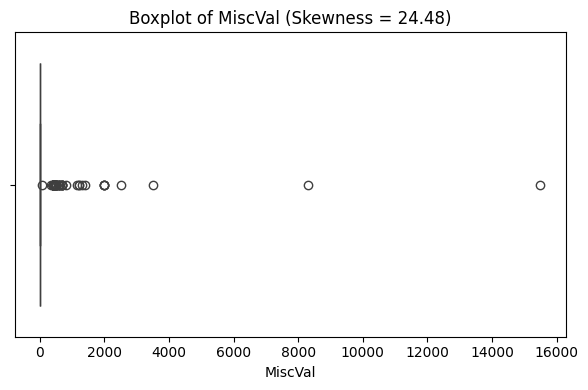

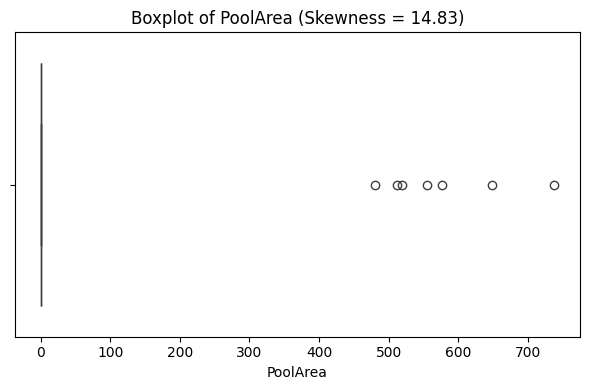

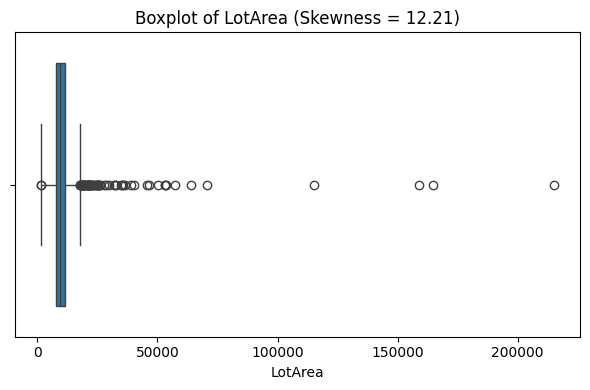

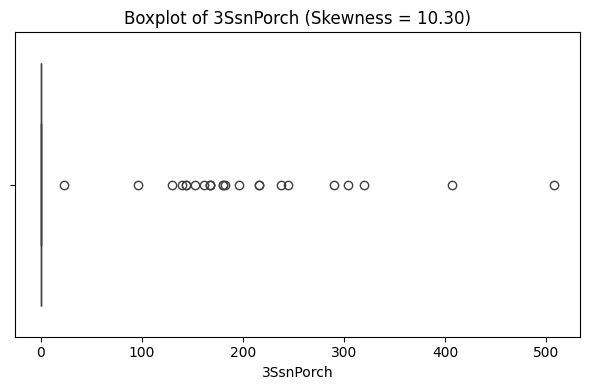

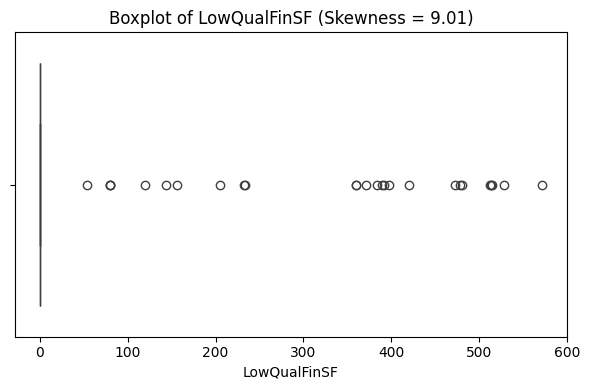

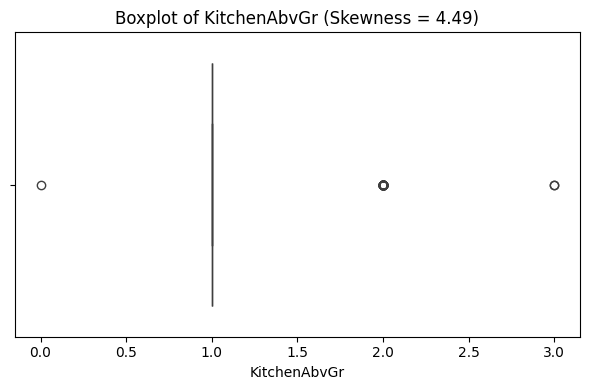

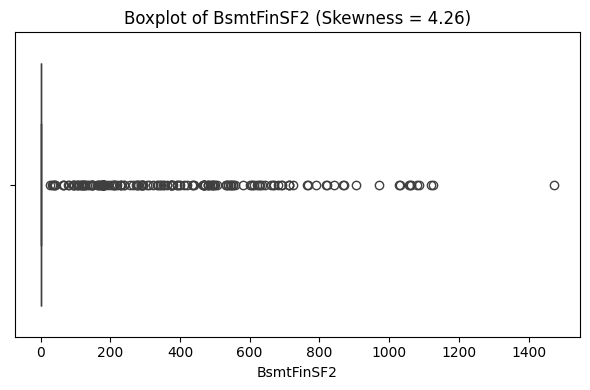

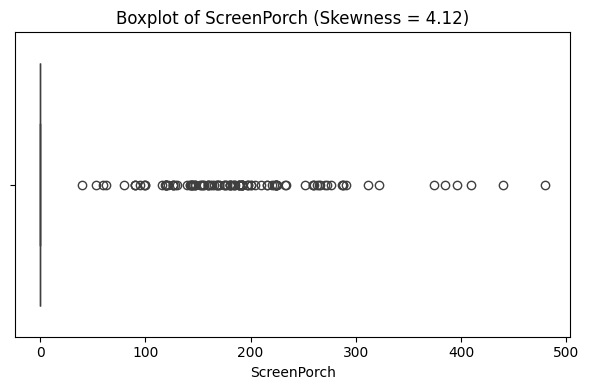

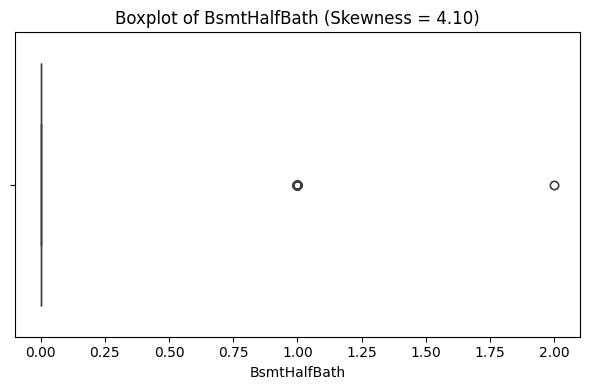

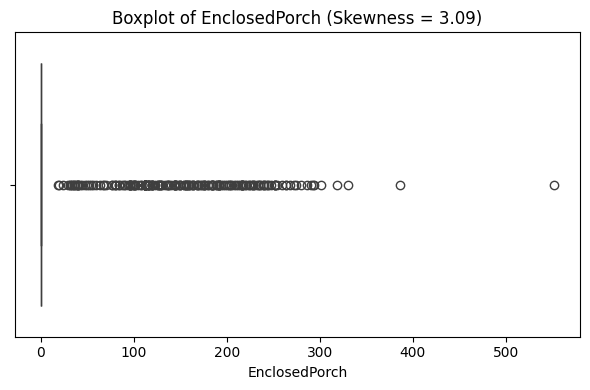

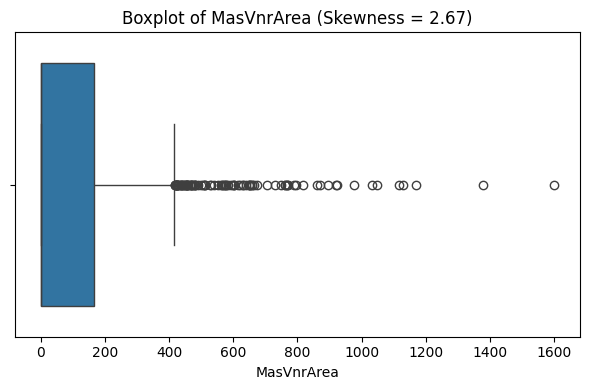

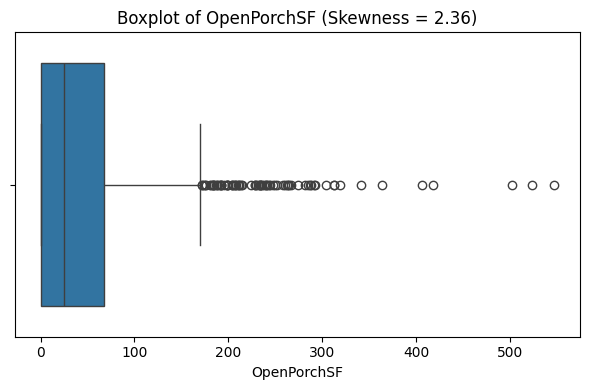

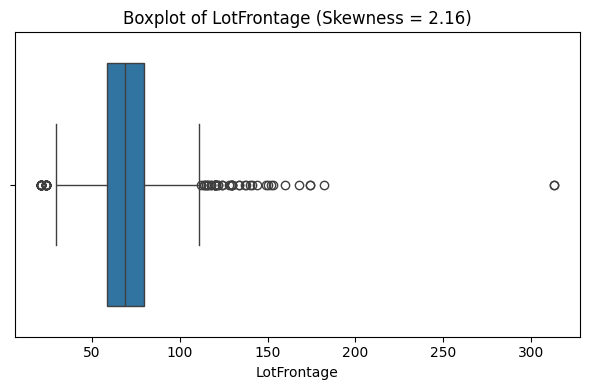

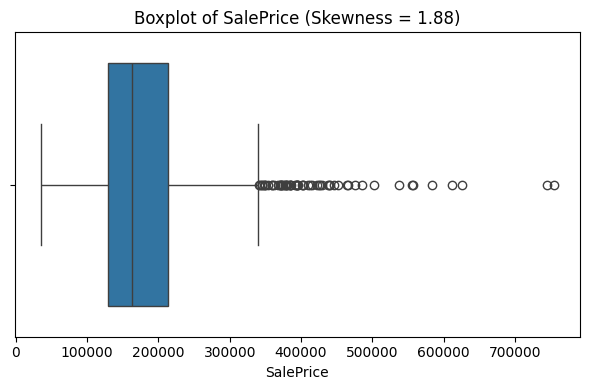

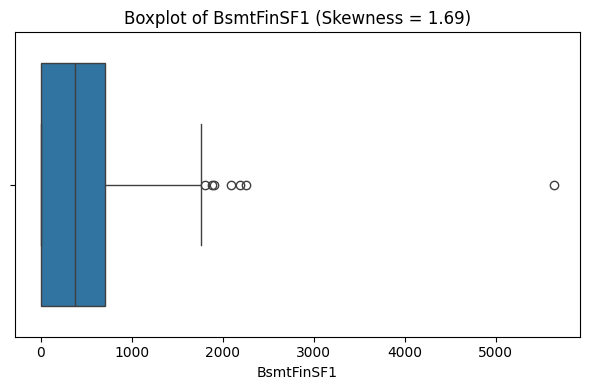

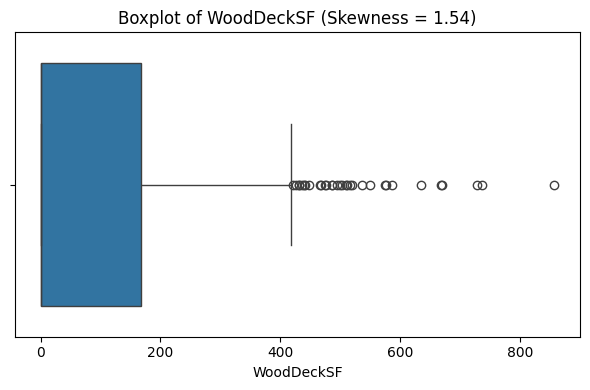

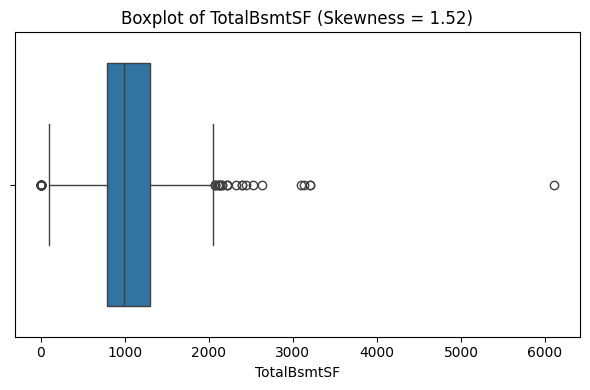

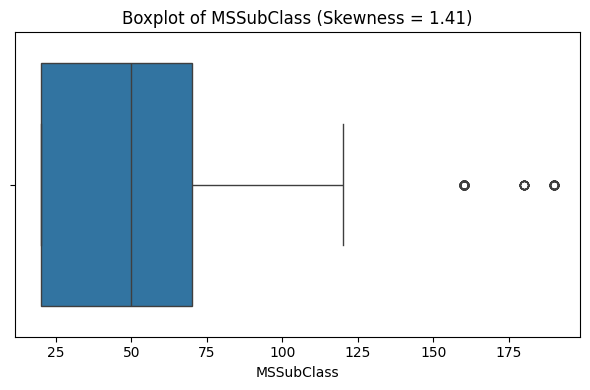

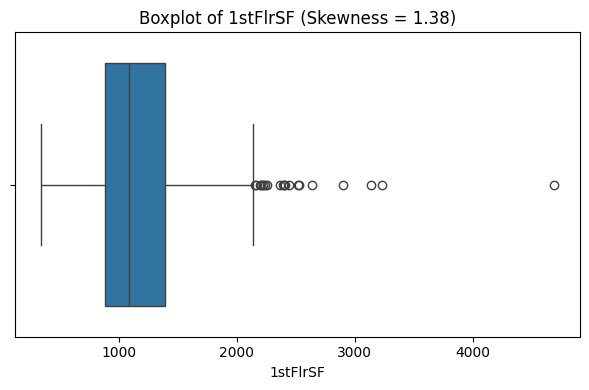

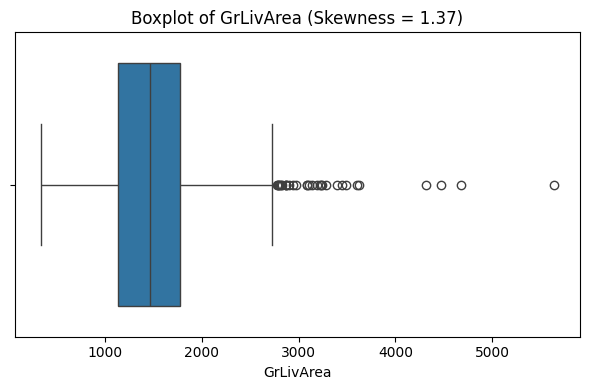

In [ ]:
# %%

# === Boxplots for highly skewed features ===
high_skew_cols = skew_values[skew_values > 1].index

for col in high_skew_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Skewness = {skew_values[col]:.2f})')
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(f"../fig/eda/{col}_boxplot.png")
    plt.show()
    plt.close()

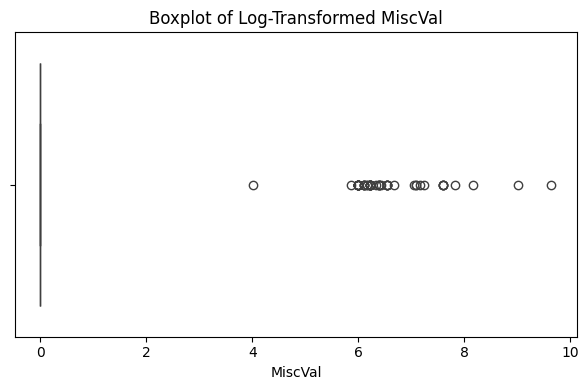

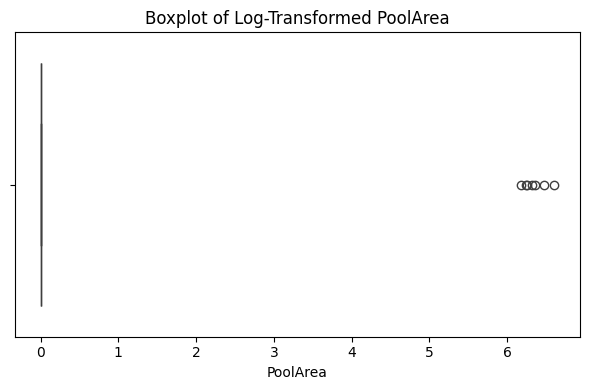

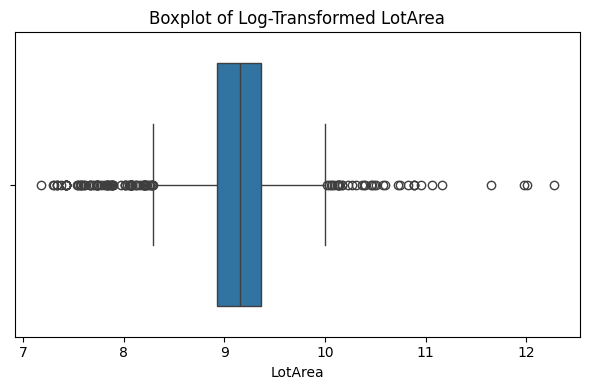

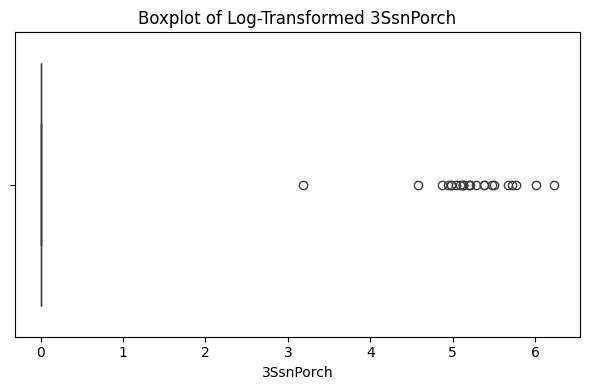

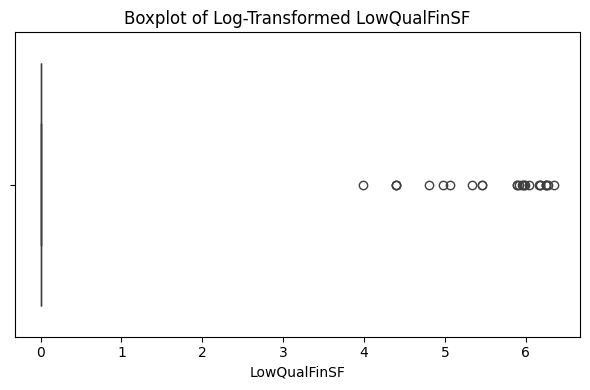

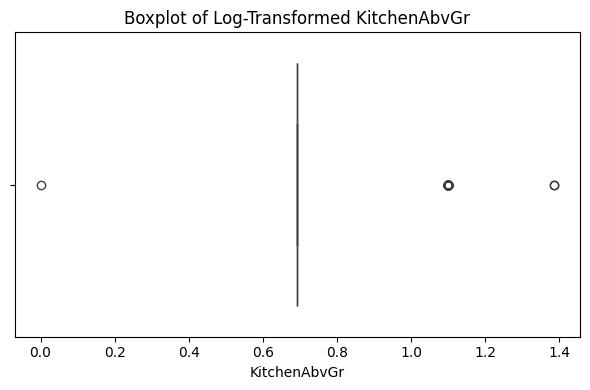

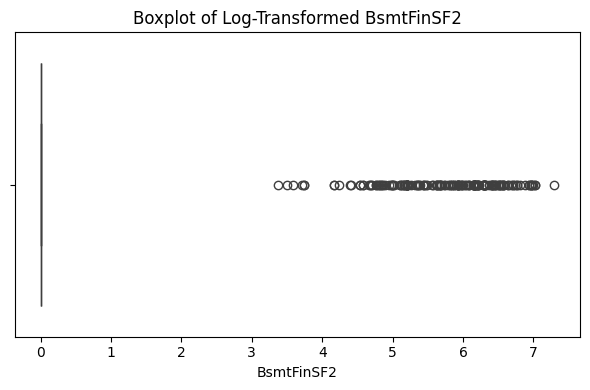

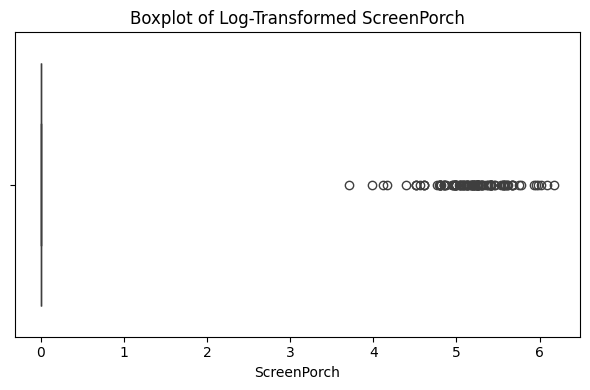

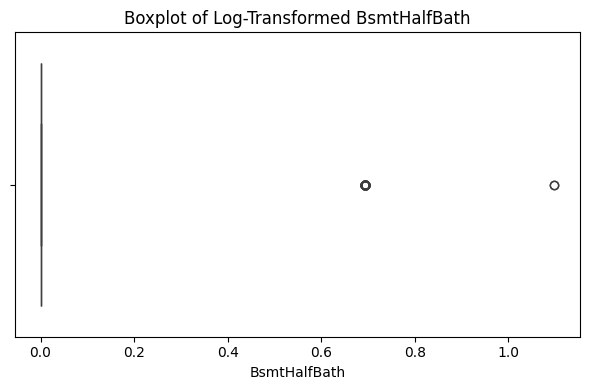

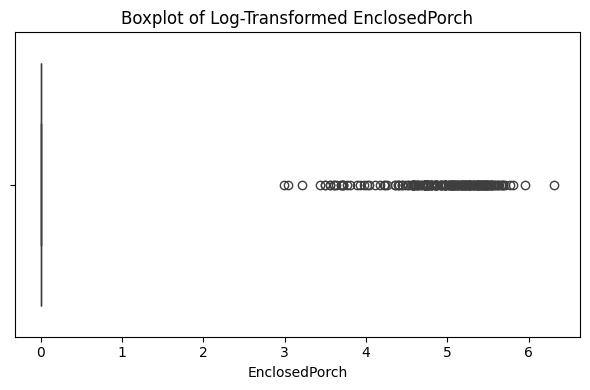

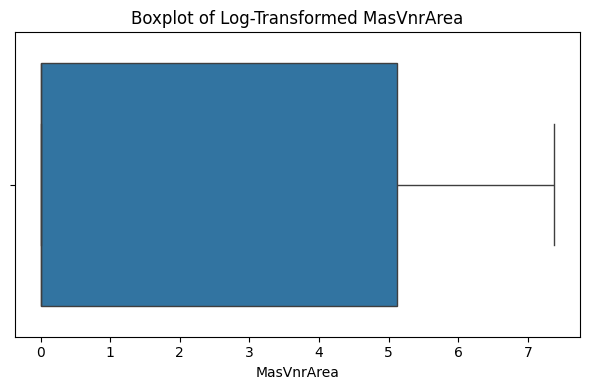

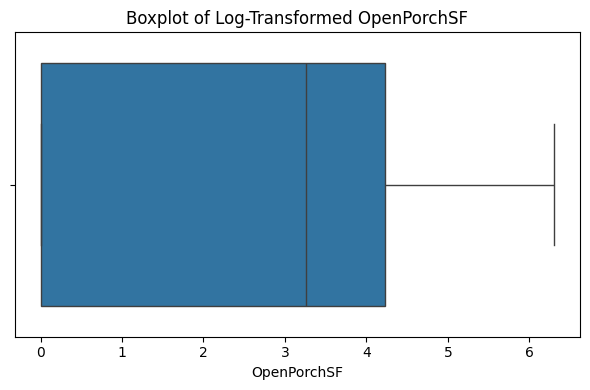

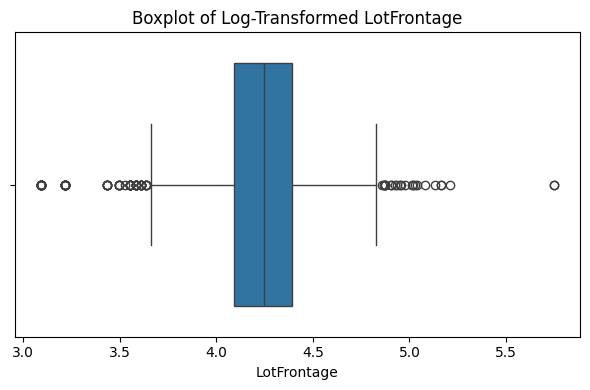

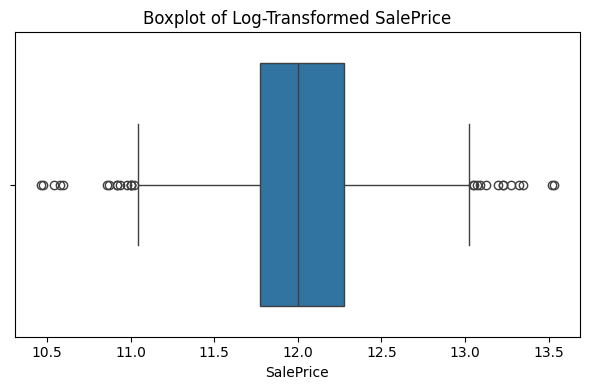

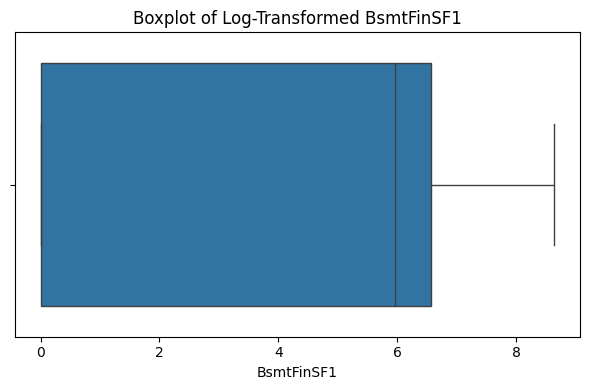

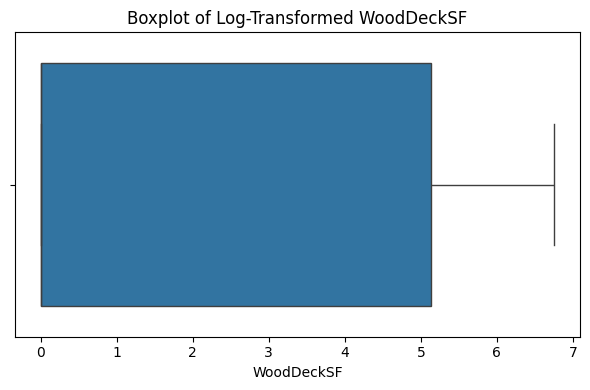

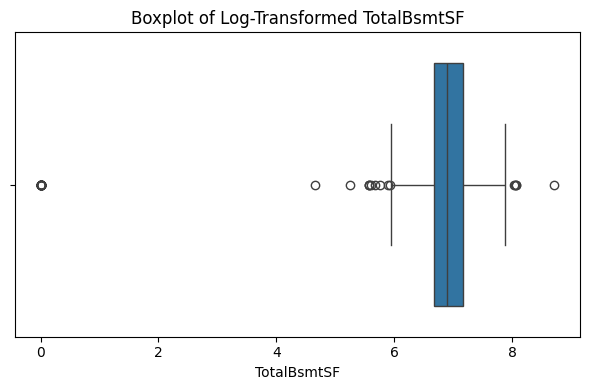

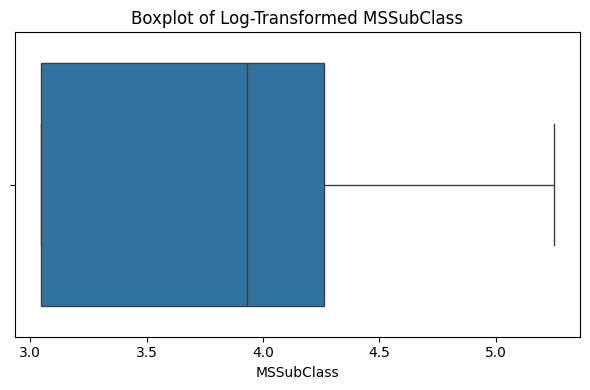

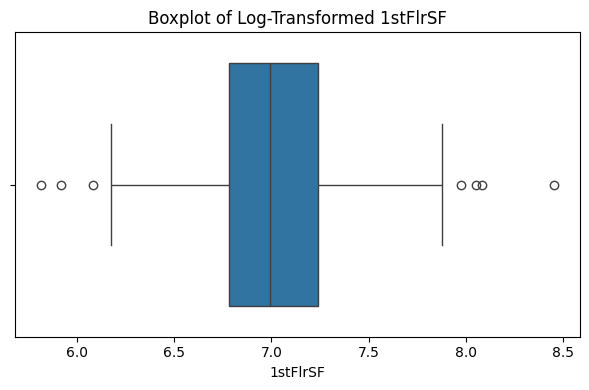

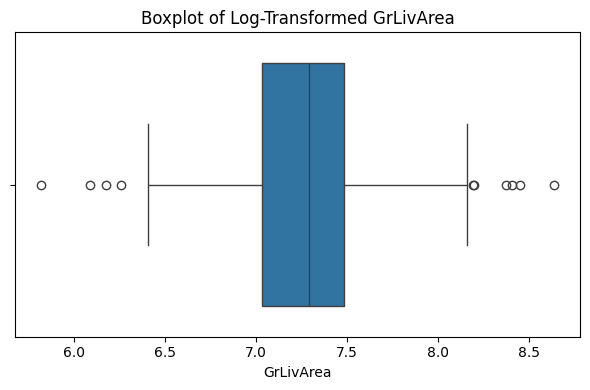

In [ ]:
# %%

# === Log1p transform highly skewed features ===
df_log_transformed = df.copy()
for col in high_skew_cols:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Boxplots of transformed features
for col in high_skew_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_log_transformed[col])
    plt.title(f'Boxplot of Log-Transformed {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(f"../fig/eda/log_{col}_boxplot.png")
    plt.show()
    plt.close()

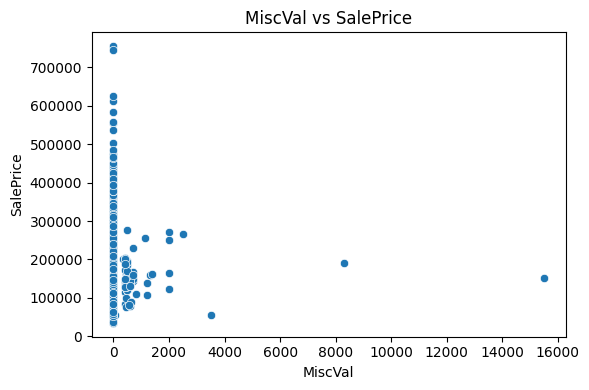

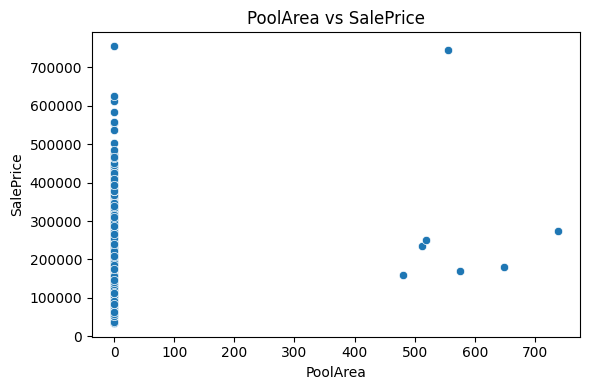

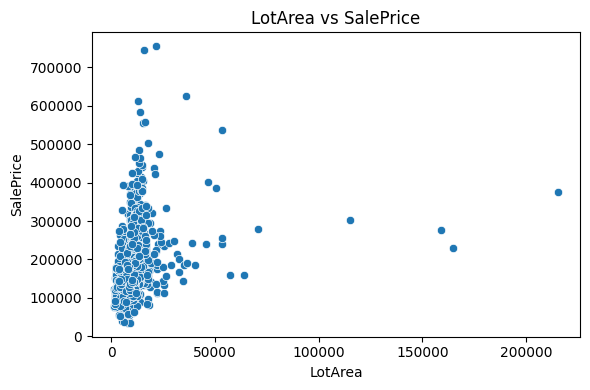

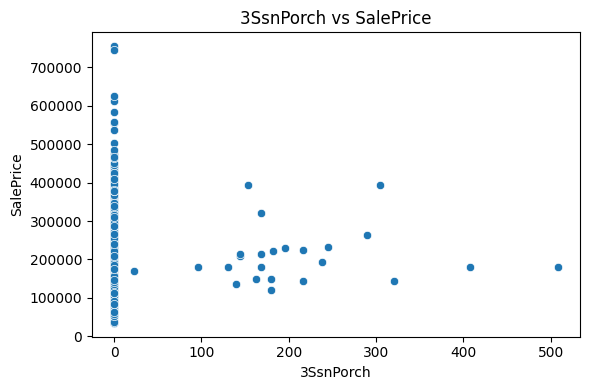

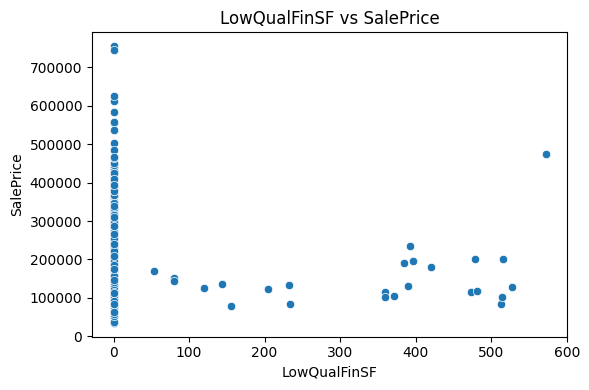

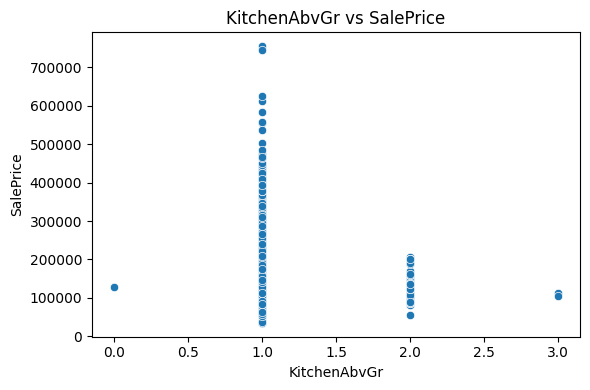

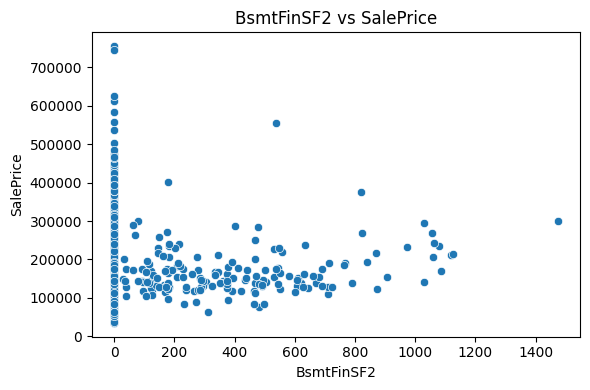

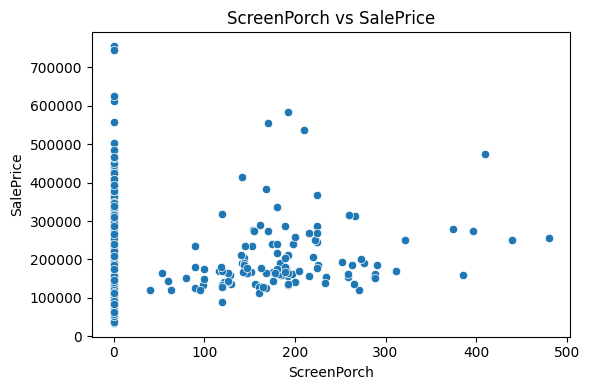

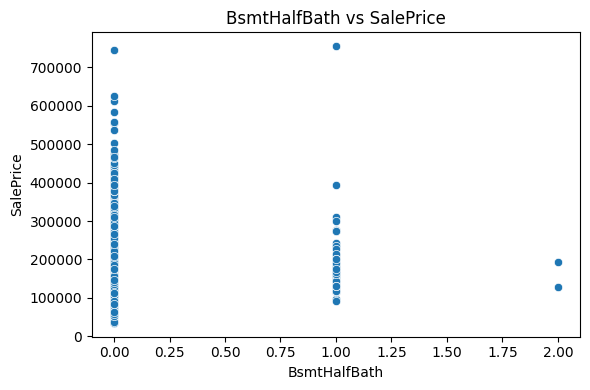

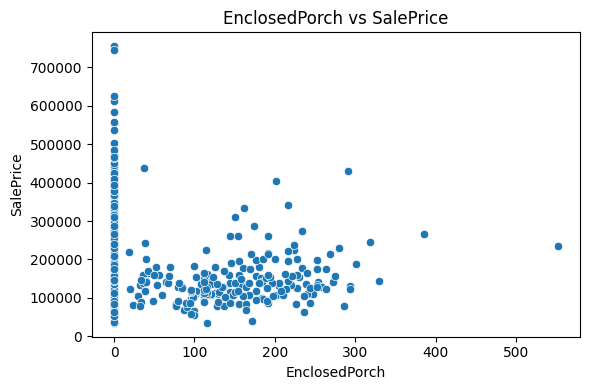

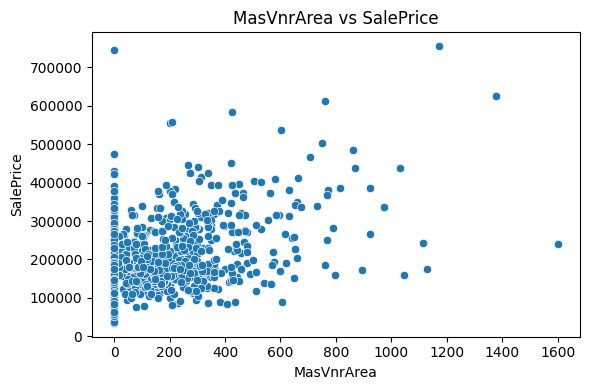

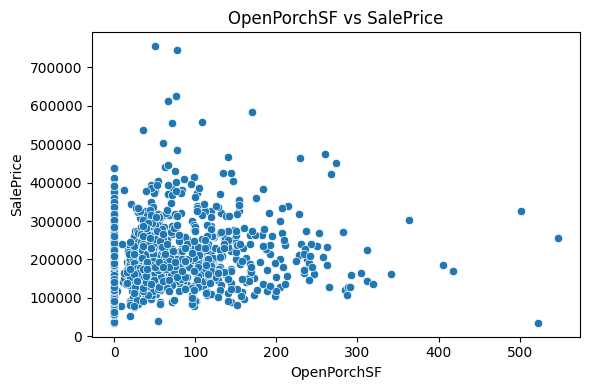

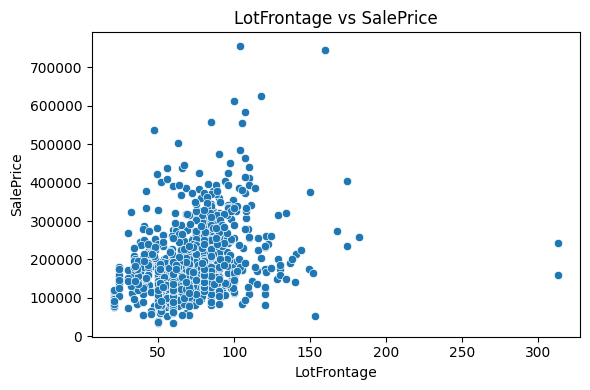

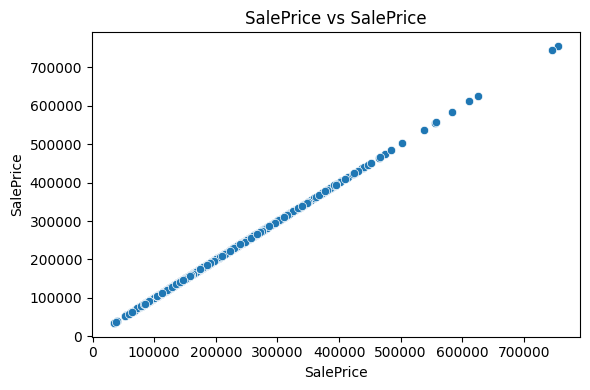

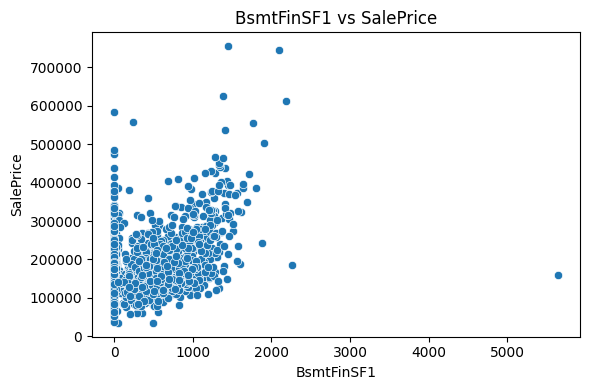

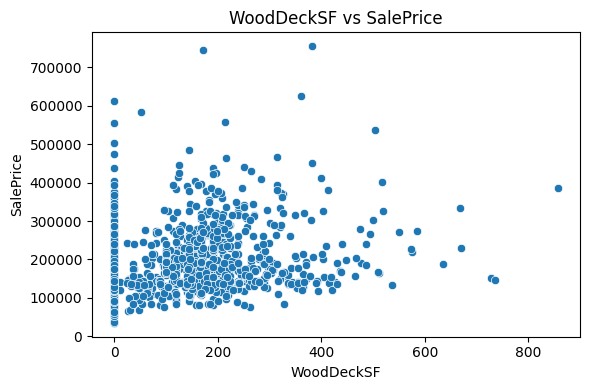

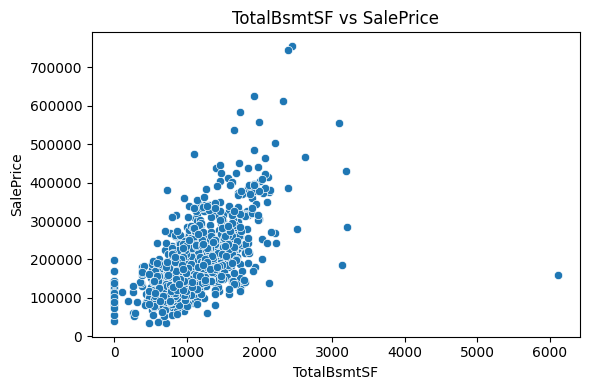

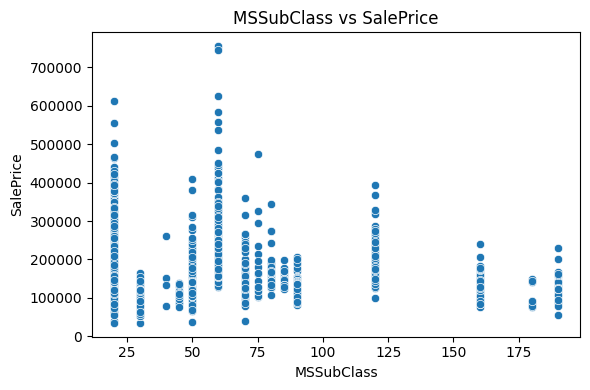

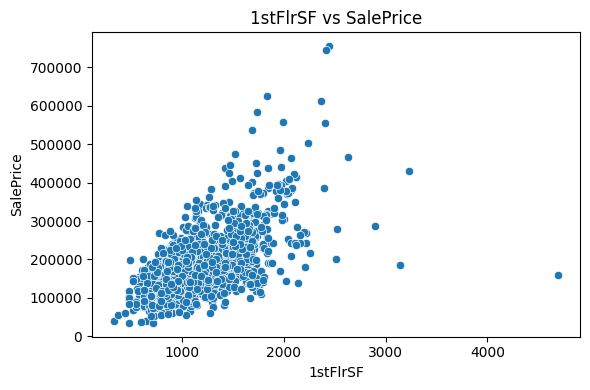

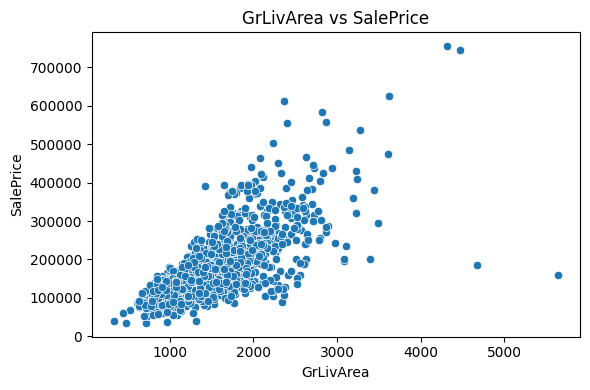

In [ ]:
# %%

# === Pairplots of highly skewed features vs SalePrice before transformation ===
for col in high_skew_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.savefig(f"../fig/eda/{col}_vs_saleprice_before.png")
    plt.show()
    plt.close()

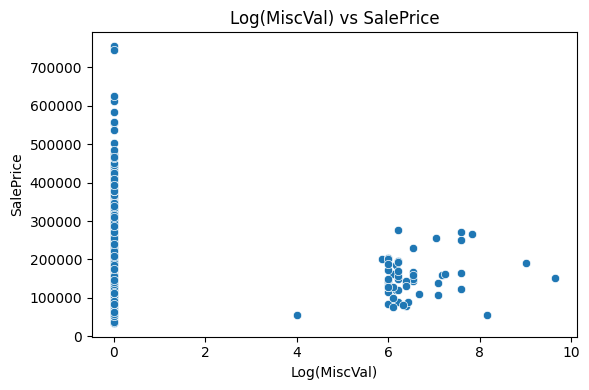

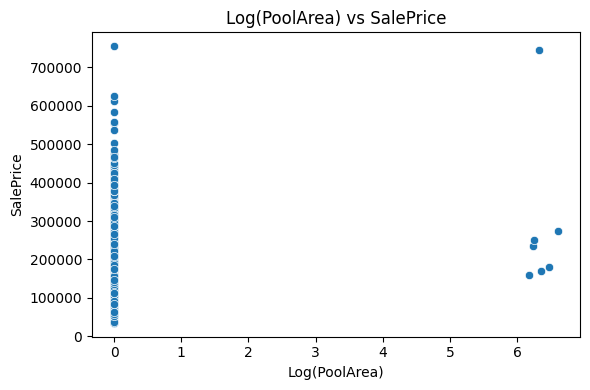

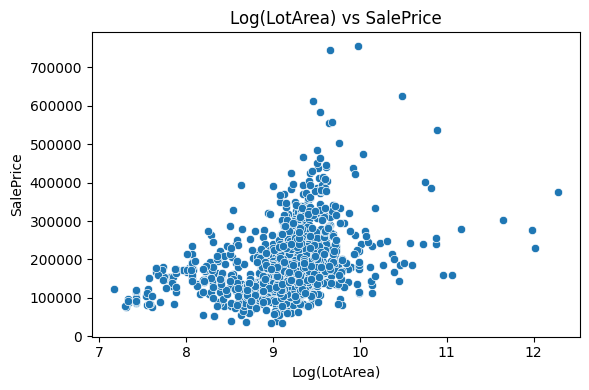

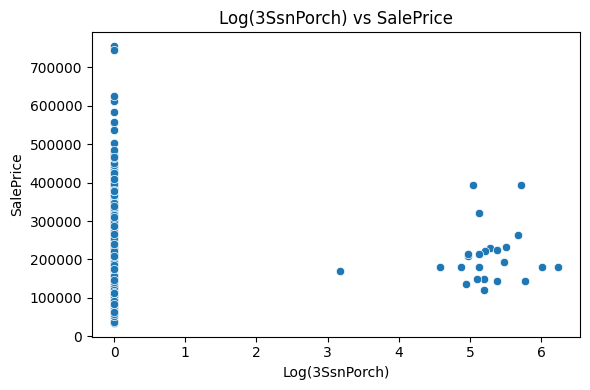

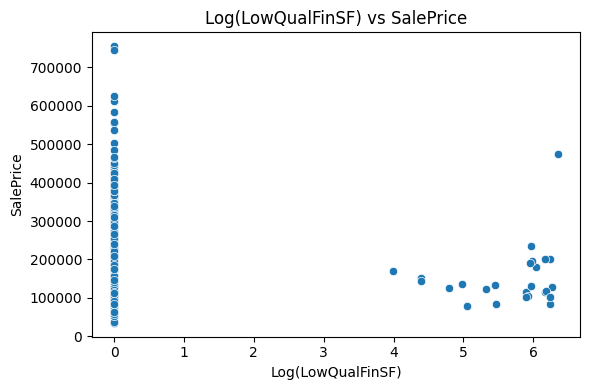

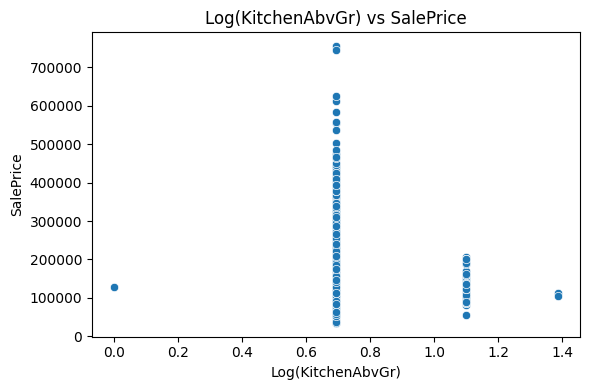

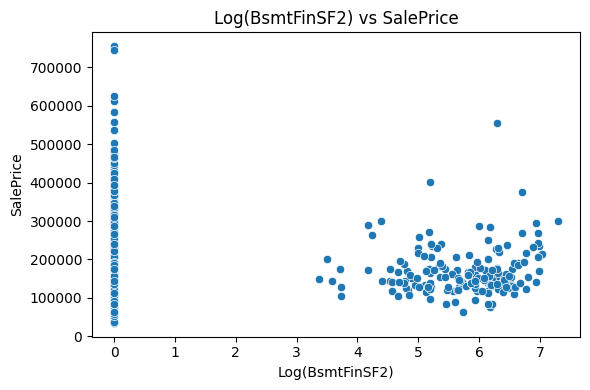

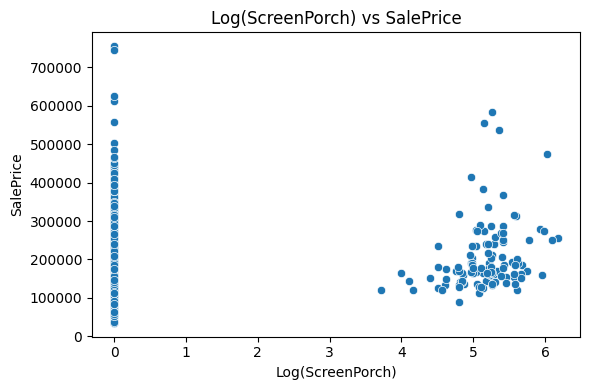

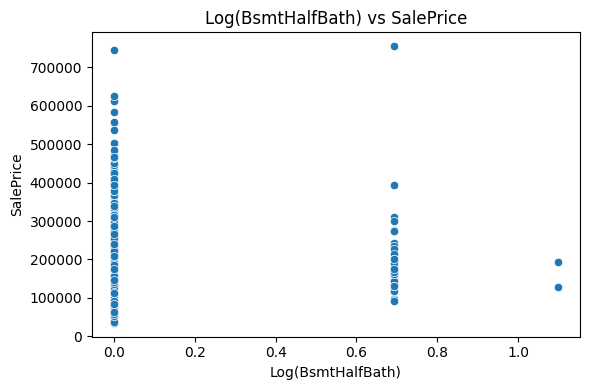

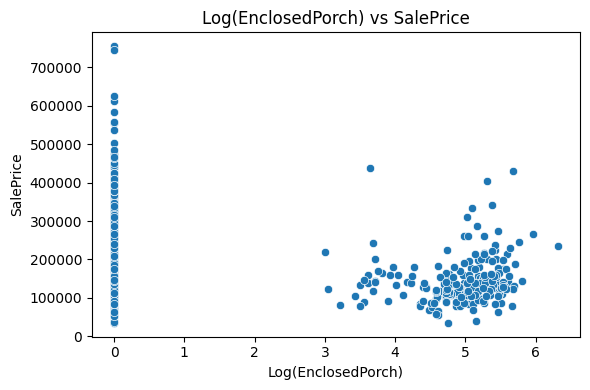

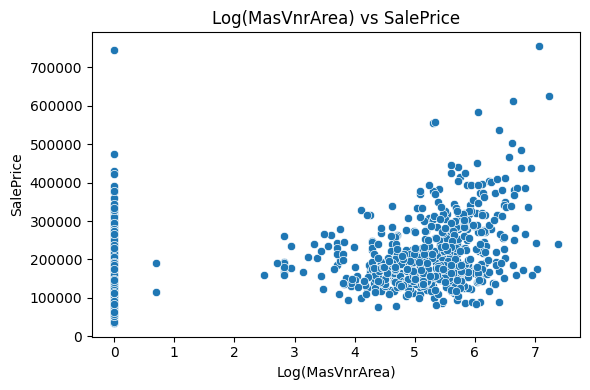

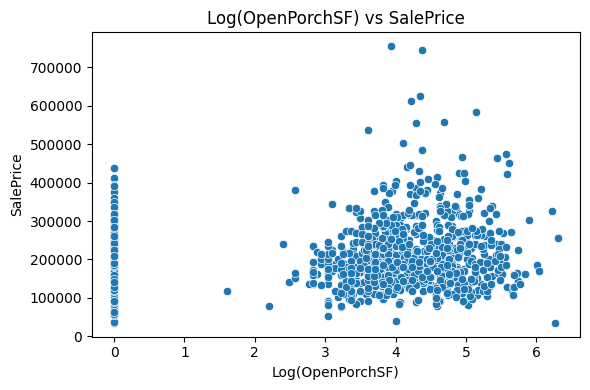

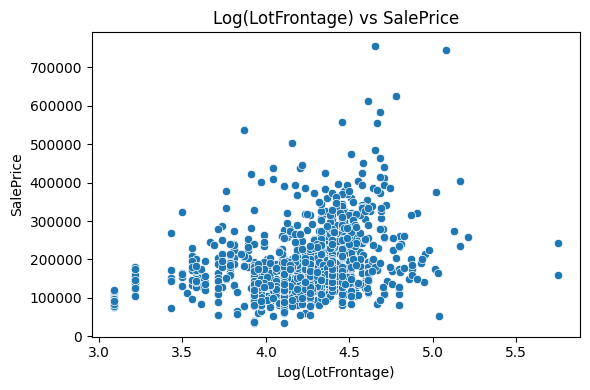

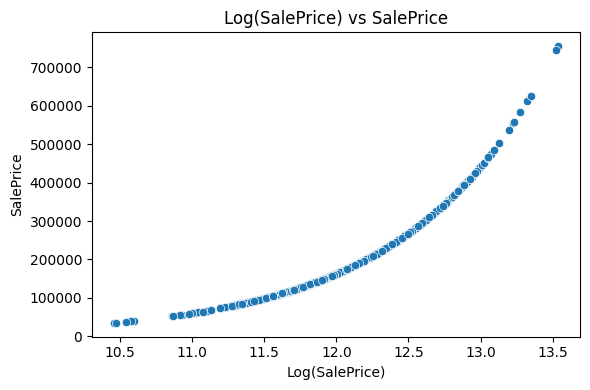

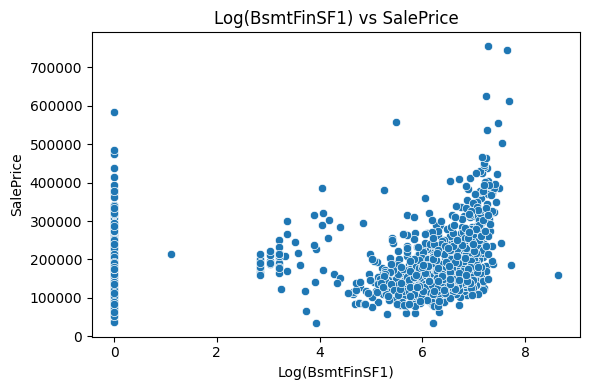

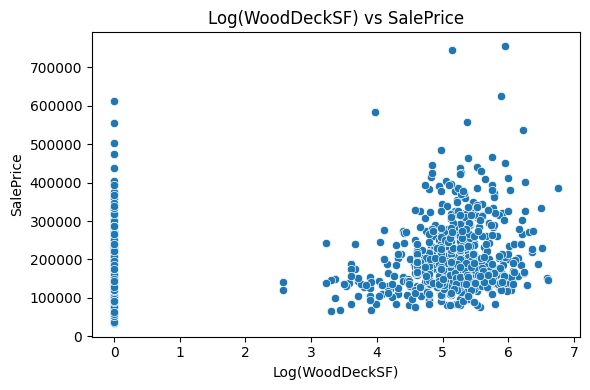

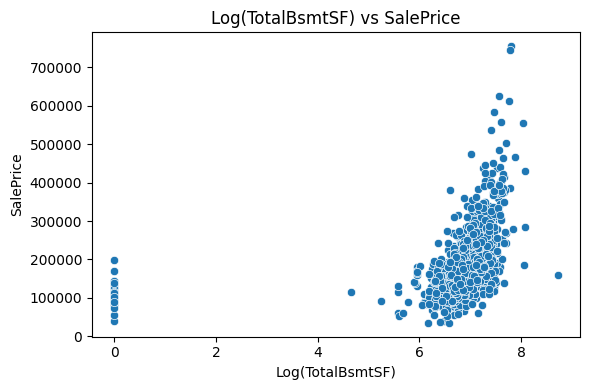

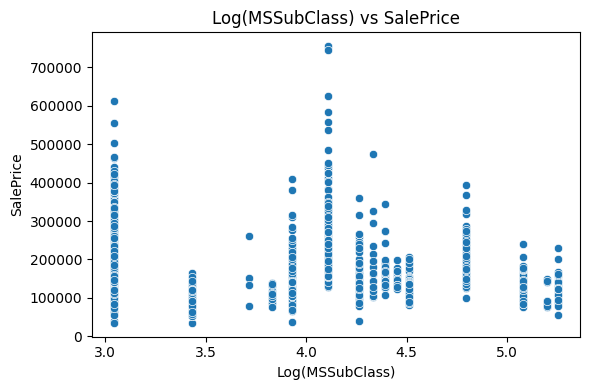

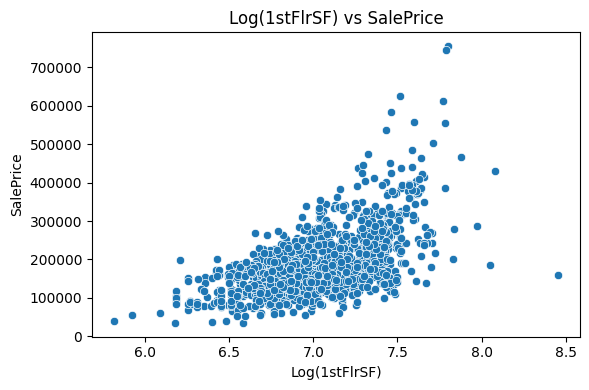

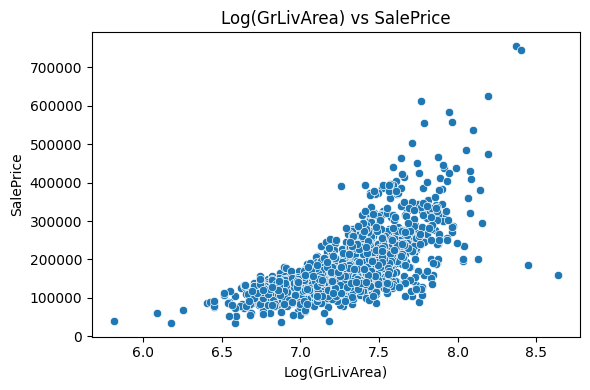

In [ ]:
# %%

# === Pairplots of highly skewed features vs SalePrice after log1p transformation ===

# Create individual scatter plots for each log-transformed skewed feature vs SalePrice
for col in high_skew_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_log_transformed[col], y=df['SalePrice'])
    plt.title(f'Log({col}) vs SalePrice')
    plt.xlabel(f'Log({col})')
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.savefig(f"../fig/eda/log_{col}_vs_saleprice_after.png")
    plt.show()
    plt.close()

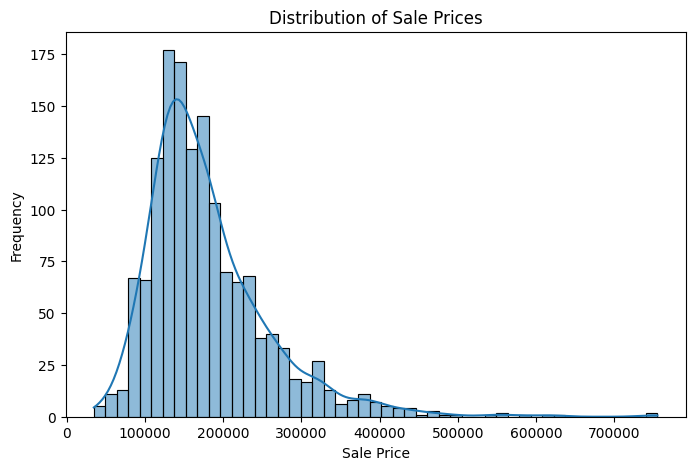

In [ ]:
# %%

# === Target variable distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.savefig("../fig/eda/saleprice_distribution.png")
plt.show()
plt.close()

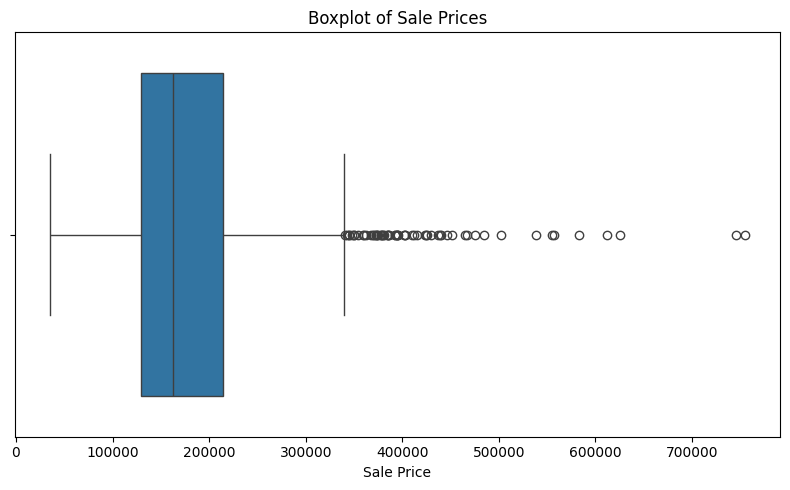

In [ ]:
# %%

# === Boxplot of target variable ===
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of Sale Prices')
plt.xlabel('Sale Price')
plt.tight_layout()
plt.savefig("../fig/eda/saleprice_boxplot.png")
plt.show()
plt.close()

In [ ]:
# %%

# === Check skewness after log1p transformation of target variable ===
df['SalePrice_log'] = np.log1p(df['SalePrice'])
log_skew = df['SalePrice_log'].skew()
print(f"Skewness after log1p transformation: {log_skew:.4f}")

Skewness after log1p transformation: 0.1213


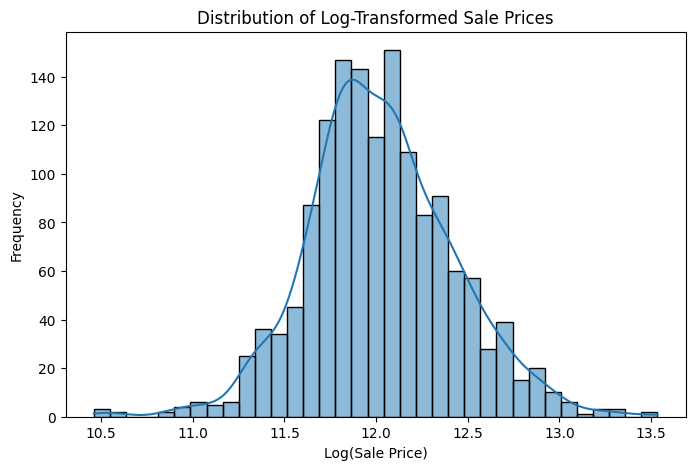

In [ ]:
# %%

# === Distribution of log-transformed SalePrice ===
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice_log'], kde=True)
plt.title('Distribution of Log-Transformed Sale Prices')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.savefig("../fig/eda/saleprice_log_hist.png")
plt.show()
plt.close()

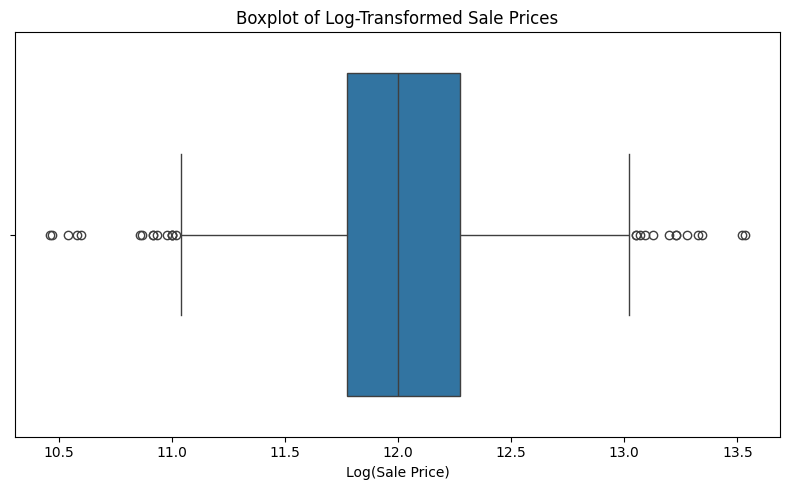

In [ ]:
# %%

# === Boxplot of log-transformed SalePrice ===
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SalePrice_log'])
plt.title('Boxplot of Log-Transformed Sale Prices')
plt.xlabel('Log(Sale Price)')
plt.tight_layout()
plt.savefig("../fig/eda/saleprice_log_boxplot.png")
plt.show()
plt.close()

# %% [markdown]

 There is a right skew in sale prices (target variable). Applying log1p solves the skewness issue and visually it looks approximately normal.